In [1]:
%load_ext watermark
%watermark -p torch,lightning

torch    : 2.2.2
lightning: 2.5.2



In [2]:
import lightning as L
import torch
import torchvision
import torch.nn.functional as F
import torchmetrics
from lightning.pytorch.loggers import CSVLogger
import matplotlib.pyplot as plt
import numpy as np

from shared_utilities import LightningModel,MNISTDataModule,plot_loss_and_acc

In [3]:
L.pytorch.seed_everything(123)

dm = MNISTDataModule()
dm.prepare_data()
dm.setup()

Seed set to 123


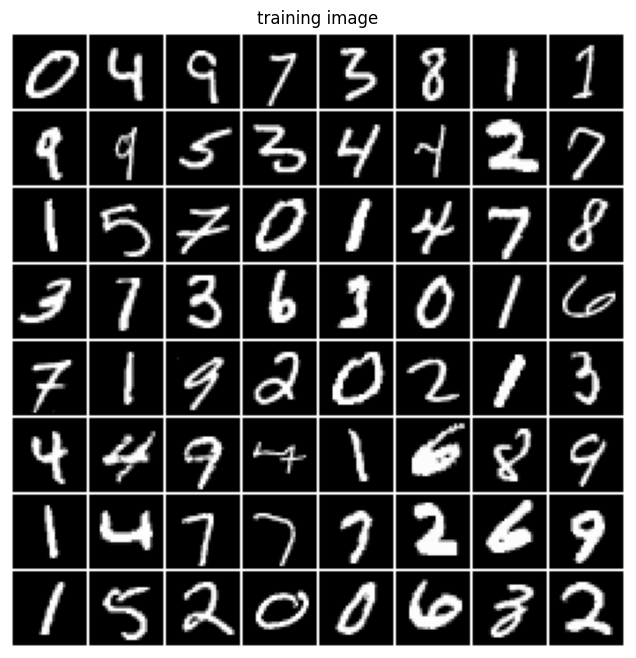

In [4]:
for images, labels in dm.train_dataloader():
    break

plt.figure(figsize=(8,8))
plt.axis('off')
plt.title("training image")
plt.imshow(
    np.transpose(
        torchvision.utils.make_grid(
            images[:64],
            padding=1,
            pad_value=1.0,
            normalize=True
        ),
        (1,2,0)
    )
)
plt.show()

In [5]:
class PyTorchMLP(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super().__init__()

        self.all_layers = torch.nn.Sequential(
            torch.nn.Linear(num_features, 128),
            torch.nn.BatchNorm1d(128),
            torch.nn.ReLU(),

            torch.nn.Linear(128, 64),
            torch.nn.BatchNorm1d(64),
            torch.nn.ReLU(),

            #output layer
            torch.nn.Linear(64, num_classes),
        )

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        logits = self.all_layers(x)
        return logits

In [6]:

L.seed_everything(123)

dm = MNISTDataModule()
pymodel = PyTorchMLP(num_features=784, num_classes=10)
l_model = LightningModel(model=pymodel, learning_rate=0.05, num_classes=10)

trainer = L.Trainer(
    max_epochs=10,
    accelerator='auto',
    devices='auto',
    logger=CSVLogger(save_dir='logs/', name='mlp_baseline'),
    deterministic=True,
)

Seed set to 123
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [6]:
trainer.fit(model=l_model,datamodule=dm)


  | Name      | Type               | Params | Mode 
---------------------------------------------------------
0 | model     | PyTorchMLP         | 109 K  | train
1 | train_acc | MulticlassAccuracy | 0      | train
2 | val_acc   | MulticlassAccuracy | 0      | train
3 | test_acc  | MulticlassAccuracy | 0      | train
---------------------------------------------------------
109 K     Trainable params
0         Non-trainable params
109 K     Total params
0.439     Total estimated model params size (MB)
12        Modules in train mode
0         Modules in eval mode


/Users/slackroo/Data_science/Deeplearning/seb_pytorch/.venv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/slackroo/Data_science/Deeplearning/seb_pytorch/.venv/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Epoch 0: 100%|██████████| 859/859 [00:14<00:00, 59.58it/s, v_num=2]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 1: 100%|██████████| 859/859 [00:11<00:00, 71.98it/s, v_num=2, val_loss=0.135, val_acc=0.961, train_acc=0.926]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 2: 100%|██████████| 859/859 [00:12<00:00, 67.46it/s, v_num=2, val_loss=0.110, val_acc=0.969, train_acc=0.966]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 3: 100%|██████████| 859/859 [00:13<00:00, 65.86it/s, v_num=2, val_loss=0.0927, val_acc=0.971, train_acc=0.976]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 4: 100%|██████████| 859/859 [00:13<00:00, 65.68it/s, v_num=2, val_loss=0.0884, val_acc=0.974, train_acc=0.981]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 5: 100%|██████████| 859/859 [00:13<00:00, 64.55it/s, v_num=2, val_loss=0.0779, val_acc=0.976, train_acc=0.984]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 6: 100%|██████████| 859/859 [00:13<00:00, 63.28it/s, v_num=2, val_l


Detected KeyboardInterrupt, attempting graceful shutdown ...
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x111552e10>>
Traceback (most recent call last):
  File "/Users/slackroo/Data_science/Deeplearning/seb_pytorch/.venv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
KeyboardInterrupt: 

KeyboardInterrupt


KeyboardInterrupt



In [15]:
plot_loss_and_acc(trainer.logger.log_dir)

FileNotFoundError: [Errno 2] No such file or directory: 'logs/mlp_baseline/version_0/metrics.csv'

In [ ]:
trainer.test(model=l_model, datamodule=dm)